<a href="https://colab.research.google.com/github/yeesem/Time-Series-Data-Analysis/blob/main/ARIMA_Champagne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score

In [2]:
!pip install statsmodels

In [3]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 15.7 MB/s eta 0:00:00


In [4]:
!wget -nc https://lazyprogrammer.me/course_files/timeseries/perrin-freres-monthly-champagne.csv

--2023-11-08 16:14:14--  https://lazyprogrammer.me/course_files/timeseries/perrin-freres-monthly-champagne.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1598 (1.6K) [text/csv]
Saving to: ‘perrin-freres-monthly-champagne.csv’

perrin-freres-month 100%[===================>]   1.56K  --.-KB/s    in 0s      

2023-11-08 16:14:15 (31.1 MB/s) - ‘perrin-freres-monthly-champagne.csv’ saved [1598/1598]



In [5]:
!head perrin-freres-monthly-champagne.csv

Month,Perrin Freres monthly champagne sales millions ?64-?72
1964-01,2815
1964-02,2672
1964-03,2755
1964-04,2721
1964-05,2946
1964-06,3036
1964-07,2282
1964-08,2212
1964-09,2922


In [6]:
#skipfooter = 2 - skip last two rows
df = pd.read_csv('perrin-freres-monthly-champagne.csv',index_col = 'Month',parse_dates = True)

In [7]:
df.head()

,Perrin Freres monthly champagne sales millions ?64-?72
Month,
1964-01,2815.0
1964-02,2672.0
1964-03,2755.0
1964-04,2721.0
1964-05,2946.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 107 entries, 1964-01 to Perrin Freres monthly champagne sales millions ?64-?72
Data columns (total 1 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Perrin Freres monthly champagne sales millions ?64-?72  105 non-null    float64
dtypes: float64(1)
memory usage: 1.7+ KB


In [9]:
df.tail()

,Perrin Freres monthly champagne sales millions ?64-?72
Month,
1972-07,4298.0
1972-08,1413.0
1972-09,5877.0
NaN,NaN
Perrin Freres monthly champagne sales millions ?64-?72,NaN


In [10]:
df.dropna(inplace = True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105 entries, 1964-01 to 1972-09
Data columns (total 1 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Perrin Freres monthly champagne sales millions ?64-?72  105 non-null    float64
dtypes: float64(1)
memory usage: 1.6+ KB


In [12]:
df.columns = ['Sales']

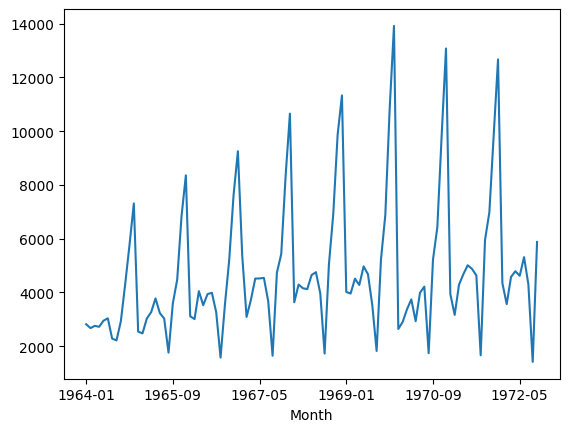

In [13]:
df['Sales'].plot();

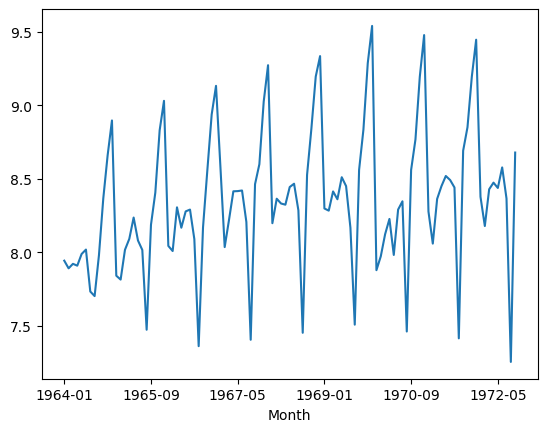

In [14]:
df['LogSales'] = np.log(df['Sales'])
df['LogSales'].plot();

In [15]:
df.index.freq = 'MS'

In [16]:
NTest = 12

train = df.iloc[:-NTest]
test = df.iloc[-NTest:]

In [17]:
train_idx = df.index <= train.index[-1]
test_idx = df.index > train.index[-1]

In [18]:
import pmdarima as pm

In [19]:
model = pm.auto_arima(
    train['LogSales'],
    trace = True,
    suppress_warning = True,
    seasonal = True,m = 12
)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=-50.311, Time=2.49 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=-41.975, Time=0.15 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=-54.968, Time=1.48 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=-53.384, Time=1.02 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=-34.700, Time=0.15 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=-44.102, Time=0.10 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=-52.971, Time=2.89 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=-52.991, Time=1.80 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=-55.117, Time=1.67 sec
 ARIMA(1,0,0)(0,1,2)[12] intercept   : AIC=-53.123, Time=2.02 sec
 ARIMA(1,0,0)(1,1,2)[12] intercept   : AIC=inf, Time=6.65 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=-50.817, Time=1.01 sec
 ARIMA(2,0,0)(0,1,1)[12] intercept   : AIC=-56.122, Time=0.77 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=-44.178, Time=0.14 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   

In [20]:
#Since the model is seasonal, we won't plot or predict the first 12
train_pred = model.predict_in_sample(start = 12,end = -1)
test_pred,confint = model.predict(n_periods = NTest,return_conf_int = True)

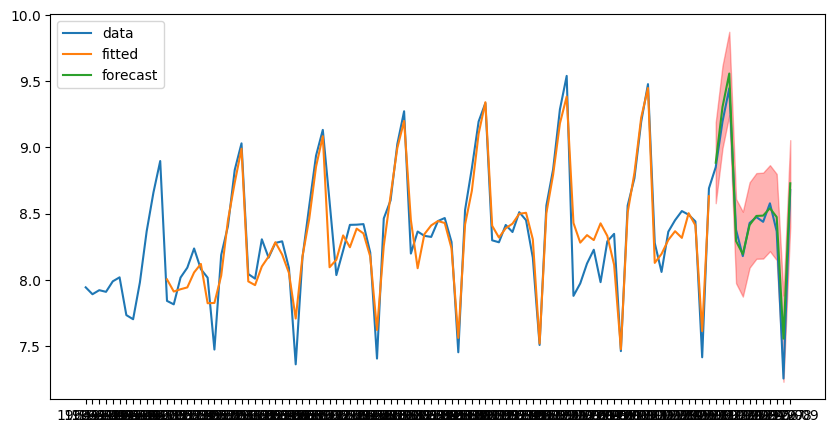

In [21]:
fig,ax = plt.subplots(figsize = (10,5))
ax.plot(df.index,df['LogSales'],label = 'data')
ax.plot(train.index[12:],train_pred,label = 'fitted')
ax.plot(test.index,test_pred,label = 'forecast')
ax.fill_between(test.index,confint[:,0],confint[:,1], \
                color = 'red',alpha = 0.3)

ax.legend()

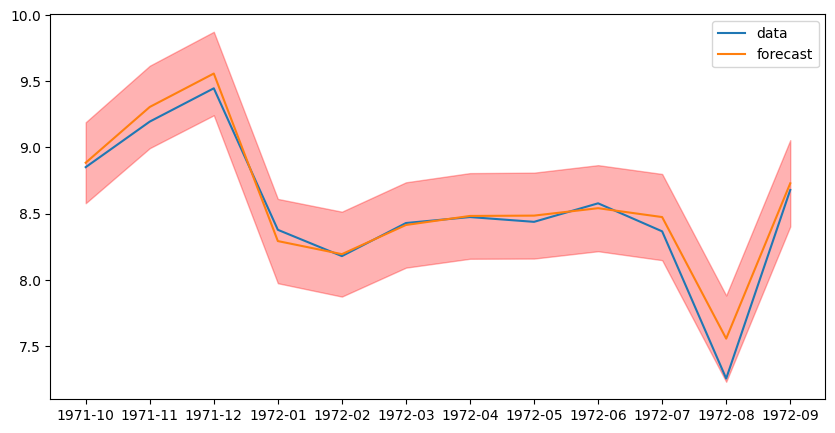

In [22]:
fig,ax = plt.subplots(figsize = (10,5))
ax.plot(test.index,test['LogSales'],label = 'data')
ax.plot(test.index,test_pred,label = 'forecast')
ax.fill_between(test.index,confint[:,0],confint[:,1], \
                color = 'red',alpha = 0.3)

ax.legend()

In [23]:
r2_score(test['Sales'],np.exp(test_pred))

0.9546864972210554

In [29]:
#Non_seasonal model
model = pm.auto_arima(
    train['LogSales'],
    trace = True,
    max_p = 12,max_q = 2,max_order = 14,
    stepwise = False,
    suppress_warining=True,
    seasonal = False
    )

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=141.911, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=141.540, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=139.851, Time=0.10 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=138.023, Time=0.10 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.58 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.47 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=114.336, Time=0.13 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=114.576, Time=0.23 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.55 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=114.173, Time=0.20 

In [31]:
train_pred = model.predict_in_sample(start = 1,end = -1)
test_pred,confint = model.predict(n_periods = NTest,return_conf_int = True)

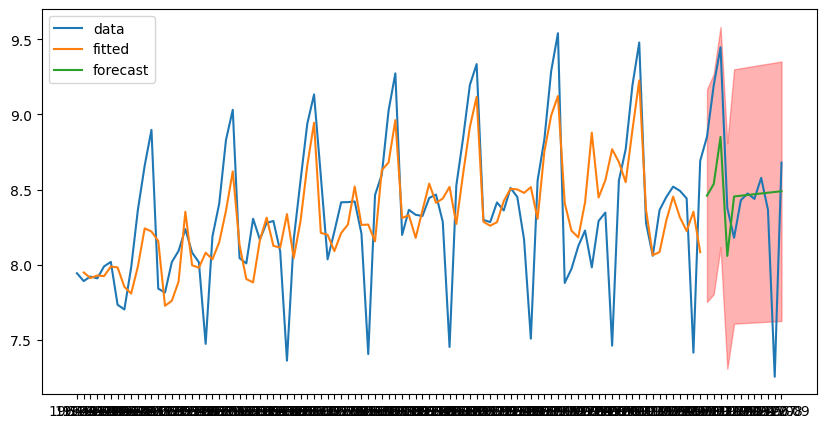

In [30]:
fig,ax = plt.subplots(figsize = (10,5))
ax.plot(df.index,df['LogSales'],label = 'data')
ax.plot(train.index[1:],train_pred,label = 'fitted')
ax.plot(test.index,test_pred,label = 'forecast')
ax.fill_between(test.index,confint[:,0],confint[:,1], \
                color = 'red',alpha = 0.3)

ax.legend()

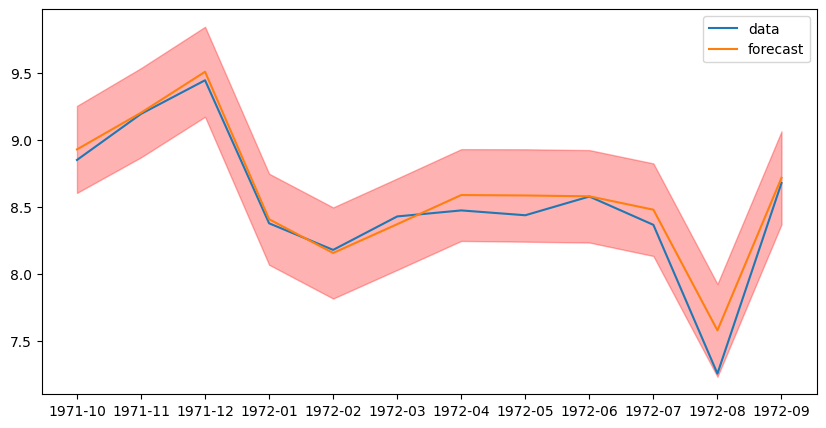

In [32]:
fig,ax = plt.subplots(figsize = (10,5))
ax.plot(test.index,test['LogSales'],label = 'data')
ax.plot(test.index,test_pred,label = 'forecast')
ax.fill_between(test.index,confint[:,0],confint[:,1], \
                color = 'red',alpha = 0.3)

ax.legend()

In [34]:
r2_score(test['Sales'],np.exp(test_pred))

0.9733087983828246

In [35]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

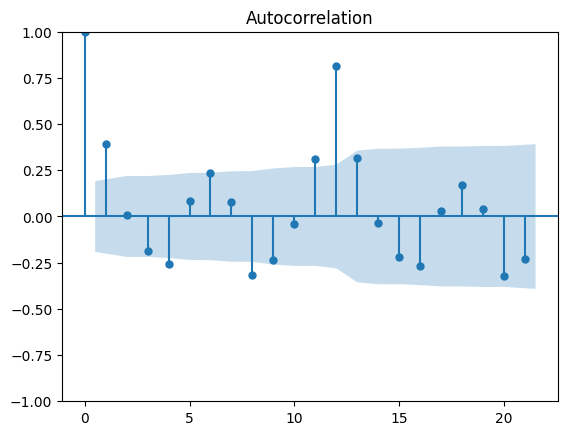

In [39]:
plot_acf(df['LogSales']);

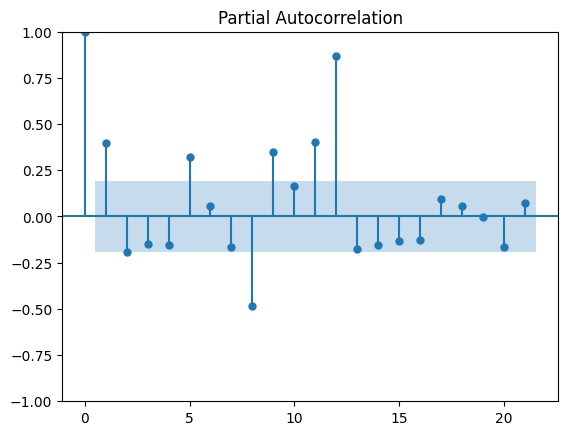

In [41]:
plot_pacf(df['LogSales'],method = 'ols');

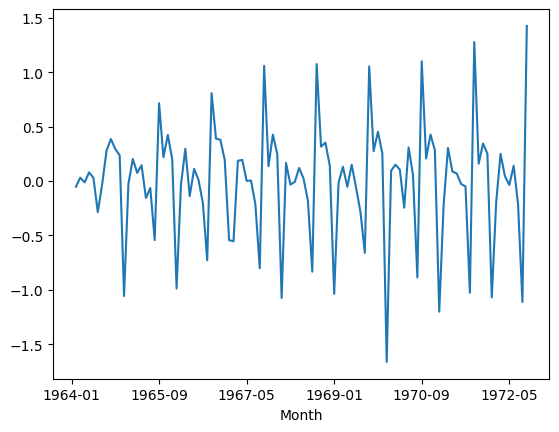

In [42]:
df['LogSales'].diff().plot();

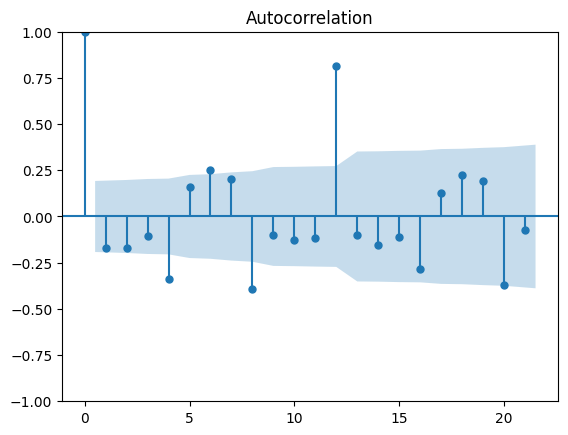

In [43]:
plot_acf(df['LogSales'].diff().dropna());

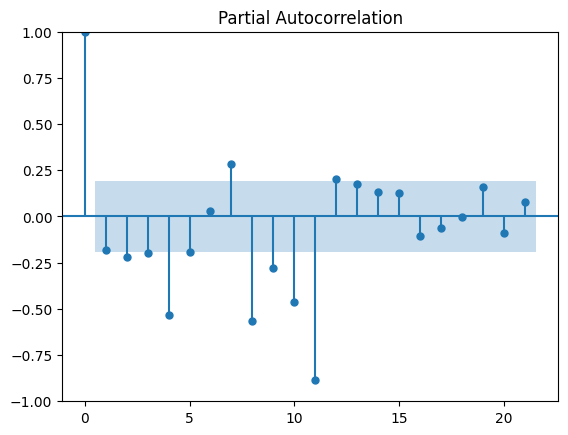

In [44]:
plot_pacf(df['LogSales'].diff().dropna(),method = 'ols');

In [46]:
from statsmodels.tsa.stattools import adfuller

In [52]:
#P-value is the second element
adfuller(df['LogSales'])

(-2.2551186012844235,
 0.18685173111687442,
 13,
 91,
 {'1%': -3.50434289821397,
  '5%': -2.8938659630479413,
  '10%': -2.5840147047458037},
 -49.19143751582993)

In [53]:
adfuller(df['LogSales'].diff().dropna())

(-4.460914465253654,
 0.00023121404649533928,
 12,
 91,
 {'1%': -3.50434289821397,
  '5%': -2.8938659630479413,
  '10%': -2.5840147047458037},
 -43.63799632128641)

In [56]:
def plot_fit_and_forecast(result,d = 0,col = 'Sales'):
  fig,ax = plt.subplots(figsize = (10,5))
  ax.plot(df[col],label = 'data')

  #Plot the curve fitted on train set
  train_pred = result.fittedvalues
  ax.plot(train.index[d:],train_pred[d:],label = 'fitted',color = 'green')

  #Forecast the test set
  prediction_result = result.get_forecast(NTest)
  conf_int = prediction_result.conf_int()
  lower,upper = conf_int[f'lower {col}'],conf_int[f'upper {col}']
  forecast = prediction_result.predicted_mean
  ax.plot(test.index,forecast,label = 'forecast')
  ax.fill_between(test.index,lower,upper,color = 'red',alpha = 0.3)
  ax.legend()

  return forecast

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Us

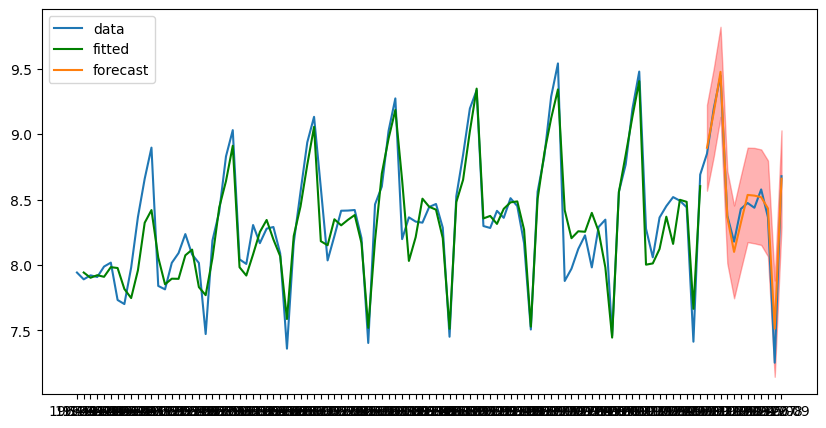

In [58]:
arima = ARIMA(train['LogSales'],order = (12,1,2))
arima_result = arima.fit()

forecast = plot_fit_and_forecast(arima_result,1,'LogSales')

In [59]:
r2_score(np.exp(forecast),test['Sales'])

0.9870653013530657